## Lab 3 - Mental Rotation

In this experiment, 54 subjects performed a mental rotation task similar to Shepard & Metzler (1971): multiple pairs of 3D objects were presented at four different rotating angles. Data was obtained from Ganis & Kievit (2015).

The goal is to analyze the relationship between subjects' reaction times (dependent variable) and angles (independent variable) both within subjects **[Tasks 1-3]** and across subjects **[Tasks 4-5]**.

Begin your solution as prompted below; everything else was written.

Refer to the lecture slides for the set of functions that you might use for this lab.


This lab must be done **individually**. The required packages have been imported for you below.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import linregress

Total number of subjects in the experiment that you will analyze.

In [12]:
nsubject = 54

The four angles (in degrees) at which 3D objects were presented.

In [13]:
unique_angles = [0,50,100,150] 

Create place-holder variable for recording mean response times (see below).

In [14]:
rt_matrix = np.zeros((nsubject,4))

Create place-holder variable for recording slopes (see below).

In [15]:
slopes = np.zeros(nsubject)

Create a meta figure that visualizes results for individual subjects, then begin analysis.

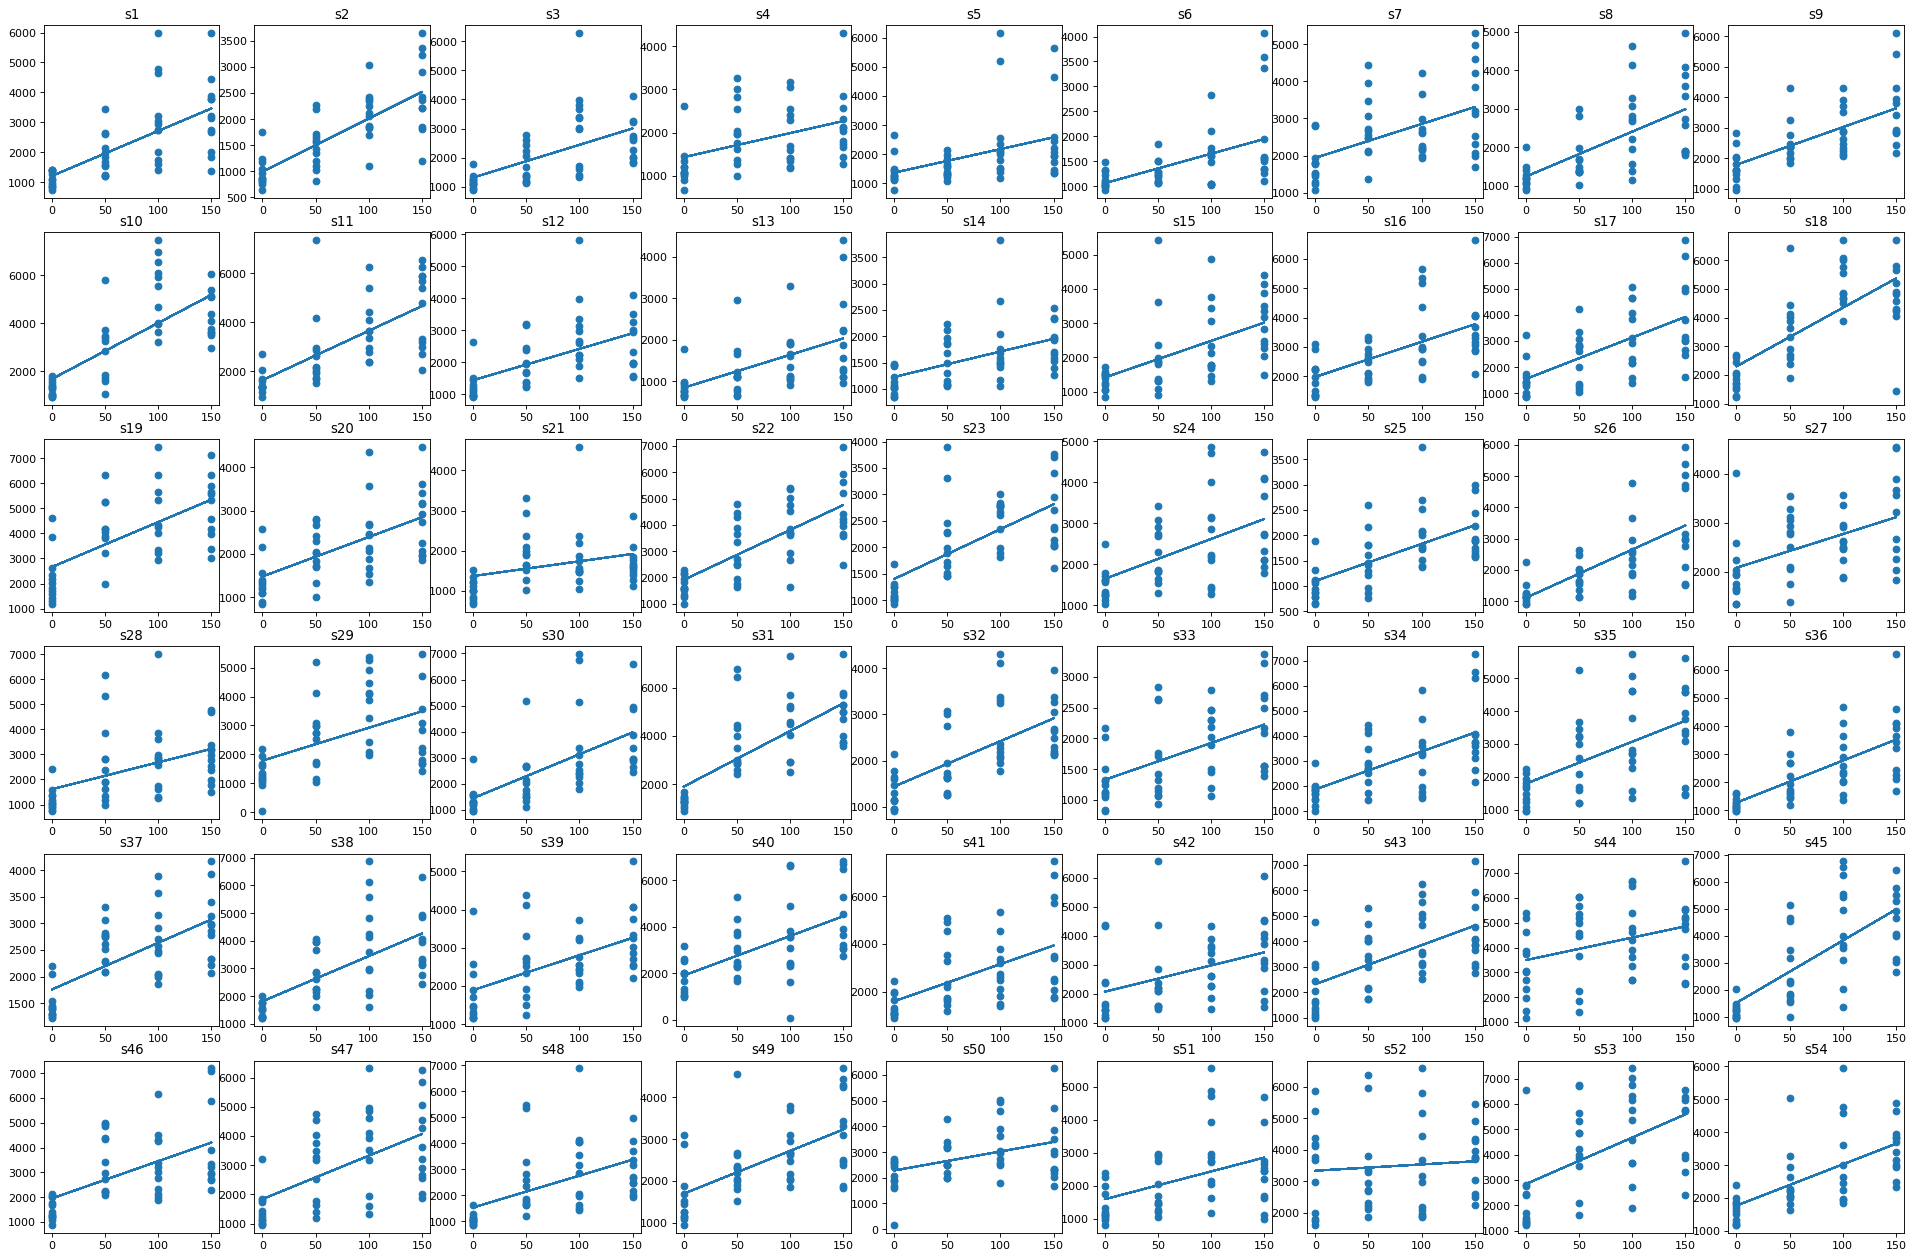

In [16]:
fig = plt.figure(figsize=(30, 20), dpi= 80, facecolor='w', edgecolor='k')

# Loop over the subjects
for s in range(0,nsubject):
    
    # Specify the file name of the subject in question
    fn_in = 'data-mental-rotation/sub'+str(s+1)

    # Read in experimental data
    with open(fn_in+'.pickle', 'rb') as f:  # Python 3: open(..., 'wb')
        stimuli, rt, angle, acc, ind_stimuli = pickle.load(f)
        
    # Focus on trials where stimulus pair is matched
    inds= np.where(ind_stimuli==0)
    
    # Register the reaction time (rt) for each trial in a vector
    rt = np.float32(rt[inds])
    # Register the angle of the object pair for each trial in a vector
    angle = np.float32(angle[inds])
    
    #========== Your solution begins here ==========
    
    # Task 1: Line fitting [3pts]
    
    #-------Task 1.1-------
    # Fit a line (linear regression) between reaction time (rt) and angle
    # i.e. rt = angle x slope + intercept
    goodIndexes = np.isfinite(angle) & np.isfinite(rt)
    linefit = np.polyfit(angle[goodIndexes], rt[goodIndexes], 1)
    
    #-------Task 1.2-------
    # Register the slope and the intercept from your line fit
    slope = linefit[0]
    intercept = linefit[1]
    
    #-------Task 1.3-------
    # Record the slope for this subject in place-holder variable "slopes"
    slopes[s] = slope
    
    # Create a subplot for this subject
    plt.subplot(6,9,s+1)
    
    # Task 2: Within-subject visualization [2pts]
    
    #-------Task 2.1-------
    # Scatter plot reaction times (y-axis) against angles (x-axis)
    plt.scatter(angle, rt)
    
    #-------Task 2.2-------
    # Juxtapose the fitted line onto this scatter plot
    y = slope * angle + intercept
    plt.plot(angle, y)
    
    # Specify title of the plot by subject index
    plt.title('s'+str(s+1))
        
    # Task 3: Within-subject statistics [1pt]
        
    #-------Task 3.1-------
    # Calculate within-subject mean response time across trials, for each angle
    angle0Rt = rt[np.where(angle == unique_angles[0])]
    angle50Rt = rt[np.where(angle == unique_angles[1])]
    angle100Rt = rt[np.where(angle == unique_angles[2])]
    angle150Rt = rt[np.where(angle == unique_angles[3])]
    
    #-------Task 3.2-------
    # Record this value in place-holder variable "rt_matrix"
    rt_matrix[s][0] = np.nanmean(angle0Rt)
    rt_matrix[s][1] = np.nanmean(angle50Rt)
    rt_matrix[s][2] = np.nanmean(angle100Rt)
    rt_matrix[s][3] = np.nanmean(angle150Rt)

plt.show()

### Task 4: Across-subject visualization [2pts]

**Task 4.1**: Take the average of mean response times across subjects, for each angle.

In [17]:
# Write your code here.
''' Computes the average response time for each angle ''' 
rtAvg = rt_matrix.mean(axis=0)
print (rtAvg)

[1537.90277552 2508.85030337 3120.91149676 3353.57024694]


**Task 4.2**: Take the standard deviation of mean response times across subjects, for each angle.

In [18]:
# Write your code here.
rtStd = rt_matrix.std(axis=0)
print (rtStd)

[478.46774874 729.36486799 889.53126205 865.22197137]


**Task 4.3**: Plot the average and standard deviation values calculated above, against the four angles.

**Task 4.4**: Label both axes.

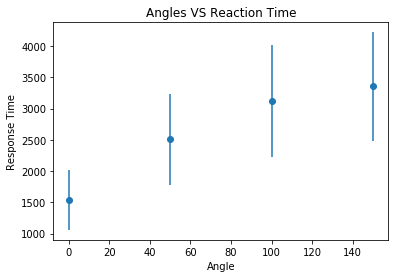

In [19]:
plt.figure()
# Write your code here.
plt.errorbar(unique_angles, rtAvg, fmt='o', yerr=rtStd)
plt.title("Angles VS Reaction Time")
plt.xlabel("Angle")
plt.ylabel("Response Time")
plt.show()

### Task 5: Across-subject statistics [2pts]

**Task 5.1**: Plot a histogram of slopes (across subjects) from the line fits in **Tasks 1.1** and **1.2**.

**Task 5.2**: Label both axes.

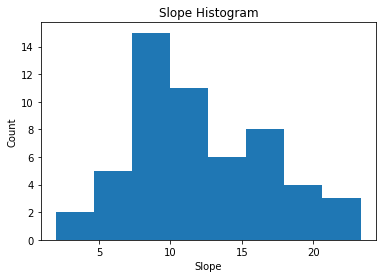

In [121]:
# Write your code here.
plt.hist(slopes, bins=8) 
plt.title("Slope Histogram")
plt.ylabel("Count")
plt.xlabel("Slope")
plt.show()

#### Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. 